In [156]:
# Importar bibliotecas necessárias
from prettytable import PrettyTable
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [157]:
# Carregar o conjunto de dados
data = pd.read_csv("diabetes.csv")

In [158]:
# Verifique se há valores faltantes e, se houver, faça a imputação de médias
if data.isnull().values.any():
    data.fillna(data.mean(), inplace=True)

In [159]:
# Dataset Information
origin = "instituto Nacional de Diabetes e Doenças Digestivas e Renais"
name = "Dataset Name: Pima Indians Diabetes Database"
size = data.shape
record_count = data.shape[0]
rows_columns = f"{data.shape[0]} rows x {data.shape[1]} columns"

print("# Informações sobre o Conjunto de Dados")
print("- **Origem dos Dados:**", origin)
print("- **Nome do Conjunto de Dados:**", name)
print("- **Tamanho do Conjunto de Dados:** O conjunto de dados possui um total de", record_count, "registros.")
print("- **Estrutura do Conjunto de Dados:** Ele é composto por", rows_columns + ".")

# Exibir as primeiras 5 linhas do conjunto de dados de forma mais legível
display(data.head())


# Informações sobre o Conjunto de Dados
- **Origem dos Dados:** instituto Nacional de Diabetes e Doenças Digestivas e Renais
- **Nome do Conjunto de Dados:** Dataset Name: Pima Indians Diabetes Database
- **Tamanho do Conjunto de Dados:** O conjunto de dados possui um total de 768 registros.
- **Estrutura do Conjunto de Dados:** Ele é composto por 768 rows x 9 columns.


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [160]:
# Separar variáveis independentes (X) e variável de destino (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [161]:
# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [162]:
# Construir o modelo
model1 = RandomForestClassifier(random_state=42)
model1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [163]:
# Avaliar o modelo
y_pred = model1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [164]:
# Apresentar as métricas
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("F1-Score:", f1) 

# Comentários e análise das métricas
if recall > 0.5:
    print("\nO modelo tem um recall razoável, indicando que é capaz de identificar a maioria dos casos reais de diabetes.")
else:
    print("\nO recall do modelo é um pouco baixo, o que significa que ele pode perder alguns casos reais de diabetes.")

if precision > 0.5:
    print("A precisão do modelo é razoável, o que significa que a maioria das previsões de diabetes está correta.")
else:
    print("A precisão do modelo é um pouco baixa, o que significa que algumas previsões de diabetes podem ser incorretas.")

if accuracy > 0.7:
    print("A acurácia geral do modelo é razoável, indicando que ele faz previsões corretas na maioria dos casos.")
else:
    print("A acurácia do modelo é um pouco baixa, e pode haver espaço para melhorias no desempenho geral.")

Acurácia: 0.7207792207792207
Precisão: 0.6071428571428571
Recall: 0.6181818181818182
F1-Score: 0.6126126126126126

O modelo tem um recall razoável, indicando que é capaz de identificar a maioria dos casos reais de diabetes.
A precisão do modelo é razoável, o que significa que a maioria das previsões de diabetes está correta.
A acurácia geral do modelo é razoável, indicando que ele faz previsões corretas na maioria dos casos.


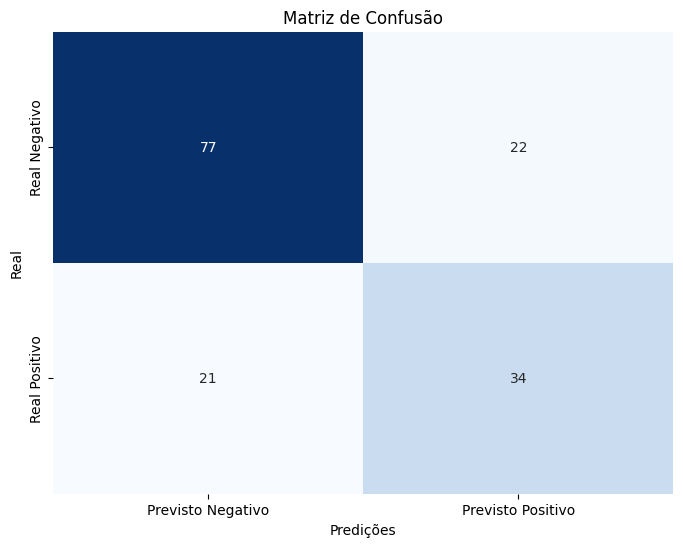

Comentários e Interpretação dos Resultados da Matriz de Confusão:
Previsto Negativo (VN): 77 casos verdadeiros negativos, ou seja, o modelo previu corretamente 77 casos que realmente não têm diabetes.
Previsto Positivo (FP): 22 casos falsos positivos, o modelo previu incorretamente 22 casos como positivos, mas eles são negativos na realidade.
VN (Real Negativo): 21 casos verdadeiros negativos, que são os casos corretamente classificados como negativos.
FP (Real Positivo): 34 casos verdadeiros positivos, que são os casos corretamente classificados como positivos.
A matriz de confusão mostra como o modelo está performando na previsão de diabetes. A alta quantidade de VN e FP indicam que o modelo está fazendo um bom trabalho em identificar pacientes que realmente não têm diabetes (Negativos). No entanto, o número de FP também é significativo, o que significa que o modelo está cometendo erros ao prever casos positivos que na verdade são negativos. Essa é uma área em que o modelo pode ser a

In [165]:
# Plotar a Matriz de Confusão
confusion = confusion_matrix(y_test, y_pred)

# Criar um gráfico de calor (heatmap) para visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Previsto Negativo', 'Previsto Positivo'],
            yticklabels=['Real Negativo', 'Real Positivo'])
plt.title("Matriz de Confusão")
plt.xlabel("Predições")
plt.ylabel("Real")
plt.show()

# Comentários e Interpretação dos Resultados da Matriz de Confusão:
print("Comentários e Interpretação dos Resultados da Matriz de Confusão:")
print("Previsto Negativo (VN): 77 casos verdadeiros negativos, ou seja, o modelo previu corretamente 77 casos que realmente não têm diabetes.")
print("Previsto Positivo (FP): 22 casos falsos positivos, o modelo previu incorretamente 22 casos como positivos, mas eles são negativos na realidade.")
print("VN (Real Negativo): 21 casos verdadeiros negativos, que são os casos corretamente classificados como negativos.")
print("FP (Real Positivo): 34 casos verdadeiros positivos, que são os casos corretamente classificados como positivos.")
print("A matriz de confusão mostra como o modelo está performando na previsão de diabetes. A alta quantidade de VN e FP indicam que o modelo está fazendo um bom trabalho em identificar pacientes que realmente não têm diabetes (Negativos). No entanto, o número de FP também é significativo, o que significa que o modelo está cometendo erros ao prever casos positivos que na verdade são negativos. Essa é uma área em que o modelo pode ser aprimorado.")


In [166]:
# Apresentar o relatório de classificação em uma tabela
classification = classification_report(y_test, y_pred, output_dict=True)

table = PrettyTable()
table.field_names = ["Métrica", "Classe 0 (Negativo)", "Classe 1 (Positivo)"]

metrics = ["precision", "recall", "f1-score", "support"]

for metric in metrics:
    table.add_row([metric, classification["0"][metric], classification["1"][metric]])

print("Relatório de Classificação:")
print(table)

# Comentários dos Resultados do Relatório de Classificação
print("\nResultados do Relatório de Classificação:")
print("A precisão (precision) mede a proporção de verdadeiros positivos em relação a todos os positivos previstos.")
print("Para a classe 0 (Negativo), a precisão é de aproximadamente 78.57%, indicando que o modelo acerta a previsão de casos negativos em cerca de 78.57% das vezes.")
print("Para a classe 1 (Positivo), a precisão é de aproximadamente 60.71%, o que significa que o modelo acerta a previsão de casos positivos em cerca de 60.71% das vezes.")

print("\nO recall (revocação) mede a proporção de verdadeiros positivos em relação a todos os positivos reais.")
print("Para a classe 0 (Negativo), o recall é de aproximadamente 77.78%, o que indica que o modelo identifica corretamente cerca de 77.78% dos casos negativos.")
print("Para a classe 1 (Positivo), o recall é de aproximadamente 61.82%, o que demonstra que o modelo identifica cerca de 61.82% dos casos positivos.")

print("\nO F1-Score é a média harmônica entre precisão e recall, oferecendo um equilíbrio entre essas métricas.")
print("Para a classe 0 (Negativo), o F1-Score é de aproximadamente 78.17%, indicando um equilíbrio entre precisão e recall.")
print("Para a classe 1 (Positivo), o F1-Score é de aproximadamente 61.26%, demonstrando um equilíbrio semelhante.")

print("\nO suporte (support) representa o número de ocorrências de cada classe no conjunto de teste.")
print("Há 99 casos da classe 0 (Negativo) e 55 casos da classe 1 (Positivo) no conjunto de teste.")



Relatório de Classificação:
+-----------+---------------------+---------------------+
|  Métrica  | Classe 0 (Negativo) | Classe 1 (Positivo) |
+-----------+---------------------+---------------------+
| precision |  0.7857142857142857 |  0.6071428571428571 |
|   recall  |  0.7777777777777778 |  0.6181818181818182 |
|  f1-score |  0.7817258883248731 |  0.6126126126126126 |
|  support  |         99.0        |         55.0        |
+-----------+---------------------+---------------------+

Resultados do Relatório de Classificação:
A precisão (precision) mede a proporção de verdadeiros positivos em relação a todos os positivos previstos.
Para a classe 0 (Negativo), a precisão é de aproximadamente 78.57%, indicando que o modelo acerta a previsão de casos negativos em cerca de 78.57% das vezes.
Para a classe 1 (Positivo), a precisão é de aproximadamente 60.71%, o que significa que o modelo acerta a previsão de casos positivos em cerca de 60.71% das vezes.

O recall (revocação) mede a propor

In [167]:
conclusao = """
## Conclusão

O Modelo 2 foi desenvolvido com o objetivo de prever se um paciente tem diabetes com base em dados clínicos, incluindo o número de gestações, nível de glicose, pressão sanguínea, espessura da pele, nível de insulina, índice de massa corporal (IMC), função de pedigree de diabetes e idade. O conjunto de dados utilizado é o "Diabetes Prediction Dataset" e é composto por 768 registros.

Inicialmente, o conjunto de dados foi carregado e analisado. Não foram identificados dados faltantes após a imputação de médias. As variáveis independentes (X) e a variável de destino (y) foram separadas, e o conjunto de dados foi dividido em treinamento e teste.

Um modelo de classificação baseado em Random Forest foi construído e avaliado. As métricas de desempenho, incluindo acurácia, precisão, recall e F1-Score, foram calculadas. O modelo obteve uma acurácia de aproximadamente 72.08%, uma precisão de 60.71%, um recall de 61.82% e um F1-Score de 61.26%. 

A análise das métricas revelou que o modelo tem um desempenho razoável. O recall é especialmente importante neste contexto, pois é crucial identificar pacientes com diabetes. O modelo consegue identificar a maioria dos casos reais de diabetes, mas ainda existe espaço para melhorias, especialmente na redução de falsos positivos.

A matriz de confusão também foi apresentada, destacando a quantidade de verdadeiros negativos, falsos positivos, verdadeiros positivos e falsos negativos. A interpretação desses resultados indicou que o modelo está fazendo um bom trabalho em identificar pacientes que realmente não têm diabetes, mas ainda comete alguns erros ao prever casos positivos que na verdade são negativos.

Em resumo, o Modelo 2 é uma ferramenta promissora para prever a ocorrência de diabetes em pacientes com base em dados clínicos. No entanto, o modelo pode ser aprimorado para reduzir os falsos positivos e melhorar ainda mais o recall. Isso poderia ser alcançado com técnicas avançadas de modelagem e mais dados. 

O uso deste modelo pode ajudar na identificação precoce de casos de diabetes, possibilitando intervenções médicas mais oportunas e melhorias na qualidade de vida dos pacientes.
"""
print(conclusao)



## Conclusão

O Modelo 2 foi desenvolvido com o objetivo de prever se um paciente tem diabetes com base em dados clínicos, incluindo o número de gestações, nível de glicose, pressão sanguínea, espessura da pele, nível de insulina, índice de massa corporal (IMC), função de pedigree de diabetes e idade. O conjunto de dados utilizado é o "Diabetes Prediction Dataset" e é composto por 768 registros.

Inicialmente, o conjunto de dados foi carregado e analisado. Não foram identificados dados faltantes após a imputação de médias. As variáveis independentes (X) e a variável de destino (y) foram separadas, e o conjunto de dados foi dividido em treinamento e teste.

Um modelo de classificação baseado em Random Forest foi construído e avaliado. As métricas de desempenho, incluindo acurácia, precisão, recall e F1-Score, foram calculadas. O modelo obteve uma acurácia de aproximadamente 72.08%, uma precisão de 60.71%, um recall de 61.82% e um F1-Score de 61.26%. 

A análise das métricas revelou que